# Data 301 Project 1
### 02/06/2022 Abby Berglie

1. Clean the data
2. Determine the salaries for software developers and engineers (S/E) in USD.
3. Determine ...
- the average S/E salary for each currency
- the average S/E salary for each currency based on age
4. (20 pts) Plot the S/E salaries based on age for the top 4 S/E currencies represented in your merged dataset

Highlights: Pandas, Exploratory Data Analysis, Data Cleaning, Finding and Merging data

In [5]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import pycountry

In [6]:
df = pd.read_csv('../data301_proj1/AskAManagerSalarySurvey2021(Responses)-FormResponses.zip')

## Checking how many Nans and data types

In [7]:
df.isnull().sum(axis=0)

Timestamp                                       0
How old are you?                                0
Industry                                       69
Job title                                       0
Additional context on job title             20463
Annual salary                                   0
Other monetary comp                          7146
Currency                                        0
Currency - other                            27427
Additional context on income                24603
Country                                         0
State                                        4911
City                                           75
Overall years of professional experience        0
Years of experience in field                    0
Highest level of education completed          207
Gender                                        164
Race                                          160
dtype: int64

In [9]:
df.rename(columns = {"How old are you?":"Age","Job title":"Job","Additional context on job title":"ExtraJob","Annual salary":"Salary","Other monetary comp":"ExtraMoney","Overall years of professional experience":"ProfExperience","Years of experience in field":"FieldExperience","Highest level of education completed":"Education","Currency - other":"CurrencyOther","Additional context on income":"IncomeContext"},inplace = True)
df.head()
df2 = df


## Replacing NaNs with '' or 0s

In [10]:
df[['Industry', 'ExtraJob', 'IncomeContext', 'CurrencyOther', 'Country', 'State','City','Education', 'Gender', 'Race']] = df[['Industry', 'ExtraJob', 'IncomeContext', 'CurrencyOther', 'Country', 'State','City','Education', 'Gender', 'Race']].fillna('unknown')
df[['Salary','ExtraMoney']] = df[['Salary','ExtraMoney']].fillna(0)

df

,Timestamp,Age,Industry,Job,ExtraJob,Salary,ExtraMoney,Currency,CurrencyOther,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,unknown,"55,000",0.0,USD,unknown,unknown,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,unknown,"54,600",4000.0,GBP,unknown,unknown,United Kingdom,unknown,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,unknown,"34,000",0.0,USD,unknown,unknown,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,unknown,"62,000",3000.0,USD,unknown,unknown,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,unknown,"60,000",7000.0,USD,unknown,unknown,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,1/8/2022 14:37:49,25-34,Retail,Training and Development Coordinator,unknown,41600,2000.0,USD,unknown,unknown,United States,Kentucky,Louisville,5-7 years,2 - 4 years,College degree,Woman,White
27605,1/8/2022 18:13:03,25-34,Computing or Tech,contract manager,unknown,80000,6000.0,CAD,unknown,unknown,canada,unknown,toronto,1 year or less,1 year or less,Master's degree,Woman,White
27606,1/9/2022 12:04:28,25-34,Transport or Logistics,RPA Developer,unknown,75000,0.0,USD,unknown,unknown,USA,Texas,Houston,2 - 4 years,2 - 4 years,College degree,Man,"Hispanic, Latino, or Spanish origin"
27607,1/9/2022 22:49:35,25-34,Computing or Tech,IT Specialist,Desktop Support/Healp Desk,45760,0.0,USD,unknown,unknown,USA,Wisconsin,Oconomowoc,5-7 years,2 - 4 years,College degree,Man,Asian or Asian American


## Removing Punctuations and making lowercase

In [11]:
punc = "[!\"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~\`]"

def punct_remove(x):
    return re.sub(punc, '', x)

df.Salary = df.Salary.map(punct_remove).map(str.lower).map(str.strip)
df.Job = df.Job.map(str.lower).map(str.strip)
df.ExtraJob = df.ExtraJob.map(str.lower).map(str.strip)
df.Country = df.Country.map(punct_remove).map(str.lower).map(str.strip)
df.State = df.State.map(punct_remove).map(str.lower).map(str.strip)
df.City = df.City.map(punct_remove).map(str.lower).map(str.strip)
df.Currency = df.Currency.map(punct_remove).map(str.strip)

df['Salary'] = df['Salary'].astype(float)
df

,Timestamp,Age,Industry,Job,ExtraJob,Salary,ExtraMoney,Currency,CurrencyOther,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),research and instruction librarian,unknown,55000.0,0.0,USD,unknown,unknown,united states,massachusetts,boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,change & internal communications manager,unknown,54600.0,4000.0,GBP,unknown,unknown,united kingdom,unknown,cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",marketing specialist,unknown,34000.0,0.0,USD,unknown,unknown,us,tennessee,chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,program manager,unknown,62000.0,3000.0,USD,unknown,unknown,usa,wisconsin,milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",accounting manager,unknown,60000.0,7000.0,USD,unknown,unknown,us,south carolina,greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,1/8/2022 14:37:49,25-34,Retail,training and development coordinator,unknown,41600.0,2000.0,USD,unknown,unknown,united states,kentucky,louisville,5-7 years,2 - 4 years,College degree,Woman,White
27605,1/8/2022 18:13:03,25-34,Computing or Tech,contract manager,unknown,80000.0,6000.0,CAD,unknown,unknown,canada,unknown,toronto,1 year or less,1 year or less,Master's degree,Woman,White
27606,1/9/2022 12:04:28,25-34,Transport or Logistics,rpa developer,unknown,75000.0,0.0,USD,unknown,unknown,usa,texas,houston,2 - 4 years,2 - 4 years,College degree,Man,"Hispanic, Latino, or Spanish origin"
27607,1/9/2022 22:49:35,25-34,Computing or Tech,it specialist,desktop support/healp desk,45760.0,0.0,USD,unknown,unknown,usa,wisconsin,oconomowoc,5-7 years,2 - 4 years,College degree,Man,Asian or Asian American


## Sorting out Countries

In [6]:
df.Country.value_counts()

united states        9842
usa                  9014
us                   3349
canada               1656
uk                    695
                     ... 
uk for us company       1
canad                   1
cambodia                1
eritrea                 1
canadá                  1
Name: Country, Length: 236, dtype: int64

In [7]:
vals=['usa',  'u s', 'unites states', 'united sates', 'unitedstates', 'united stares', 'united stat', 'america']
def fun1(str_to_find, str_replacement):
    def findandreplace(x):
        if str_to_find in x:
            return str_replacement
        return x
    return findandreplace
for val in vals:
    fn= fun1(val, 'usa')
    df.Country = df.Country.map(fn)
    
df.Country.value_counts()

usa                19466
us                  3349
canada              1656
uk                   695
united kingdom       626
                   ...  
united kingdomk        1
colombia               1
eritrea                1
unted states           1
canadá                 1
Name: Country, Length: 199, dtype: int64

In [8]:
pycountry.countries.lookup('de')
pycountry.countries.lookup('germany')
pycountry.countries.lookup('usa').alpha_3
pycountry.countries.lookup('United States of America')

Country(alpha_2='US', alpha_3='USA', flag='🇺🇸', name='United States', numeric='840', official_name='United States of America')

In [9]:
pycountry.countries.search_fuzzy('wales')

[Country(alpha_2='AU', alpha_3='AUS', flag='🇦🇺', name='Australia', numeric='036')]

In [10]:
from tqdm.auto import tqdm  #tqdm gives you the neat little status bar, useful for very long running operations
tqdm.pandas()
def fix(df, i, cont, search_type):
    '''
    df: dataframe
    i: row
    cont: tuple from pycountry lookup hit 
    search_type: unused-what type of pycountry search was used ()
    '''
    # print(f' {search_type} {cont.alpha_3} for {df.loc[i, "Country"]}')
    df.loc[i, 'found_in_db'] = True  #found column
    df.loc[i, 'Country']=cont.alpha_3  #save the 3 letter alpha character for the country
def find_countries(df):
    #record whether pycountry finds result or not
    for i in tqdm(range(len(df))):  # for every row
        try:
            #try the most accurate lookup first
            res = pycountry.countries.lookup(df.loc[i, 'Country']) 
            #if you get here lookup returned result, use it
            fix(df, i, res, "Accurate swap")
        except LookupError as le:
            #lookup above failed, try fuzzy, you may get many results
            try:
                res = pycountry.countries.search_fuzzy(df.loc[i, 'Country'])
                #if you get here search_fuzzy returned result, should you use it?
                #SHOULD CHECK CONFIDENCE, THIS CODE DOES NOT
                fix(df, i, res[0], "Fuzzy swap")
            except LookupError as le:
                pass
    return df


df = find_countries(df)

  0%|          | 0/27609 [00:00<?, ?it/s]

In [11]:
df.Country.value_counts()

USA                                        22821
CAN                                         1659
UGA                                          696
GBR                                          636
AUS                                          388
                                           ...  
SVN                                            1
CUB                                            1
united kingdomk                                1
ERI                                            1
company in germany i work from pakistan        1
Name: Country, Length: 174, dtype: int64

## Combine the two Monitary columns to have a total amount of money for each person

In [12]:
#col_list = ['Salary', "ExtraMoney"] 
#df['TotalMoney'] = df[col_list].sum(axis=1)
df['TotalMoney'] = df['Salary']+df['ExtraMoney']
df

,Timestamp,Age,Industry,Job,ExtraJob,Salary,ExtraMoney,Currency,CurrencyOther,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race,found_in_db,TotalMoney
0,4/27/2021 11:02:10,25-34,Education (Higher Education),research and instruction librarian,unknown,55000.0,0.0,USD,unknown,unknown,USA,massachusetts,boston,5-7 years,5-7 years,Master's degree,Woman,White,True,55000.0
1,4/27/2021 11:02:22,25-34,Computing or Tech,change & internal communications manager,unknown,54600.0,4000.0,GBP,unknown,unknown,GBR,unknown,cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,True,58600.0
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",marketing specialist,unknown,34000.0,0.0,USD,unknown,unknown,USA,tennessee,chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,True,34000.0
3,4/27/2021 11:02:41,25-34,Nonprofits,program manager,unknown,62000.0,3000.0,USD,unknown,unknown,USA,wisconsin,milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,True,65000.0
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",accounting manager,unknown,60000.0,7000.0,USD,unknown,unknown,USA,south carolina,greenville,8 - 10 years,5-7 years,College degree,Woman,White,True,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27604,1/8/2022 14:37:49,25-34,Retail,training and development coordinator,unknown,41600.0,2000.0,USD,unknown,unknown,USA,kentucky,louisville,5-7 years,2 - 4 years,College degree,Woman,White,True,43600.0
27605,1/8/2022 18:13:03,25-34,Computing or Tech,contract manager,unknown,80000.0,6000.0,CAD,unknown,unknown,CAN,unknown,toronto,1 year or less,1 year or less,Master's degree,Woman,White,True,86000.0
27606,1/9/2022 12:04:28,25-34,Transport or Logistics,rpa developer,unknown,75000.0,0.0,USD,unknown,unknown,USA,texas,houston,2 - 4 years,2 - 4 years,College degree,Man,"Hispanic, Latino, or Spanish origin",True,75000.0
27607,1/9/2022 22:49:35,25-34,Computing or Tech,it specialist,desktop support/healp desk,45760.0,0.0,USD,unknown,unknown,USA,wisconsin,oconomowoc,5-7 years,2 - 4 years,College degree,Man,Asian or Asian American,True,45760.0


In [13]:
#df2['State'].unique()

## Making a consistant currency column without "Other"s

To do this, I begin by looking at what information people had put into the *CurrencyOther* column. 
I created a copy of the dataframe, **df2**, and created another column that was a copy of the *Currency* column but called it *UseCurrency*. This column will have all of the "Other" values replaced with what was in that corresponding row's *CurrencyOther* column. 
For every unique value in *CurrencyOther*, I looked at every row that had the requested value in their *CurrencyOther* column and checked if it also had "Other" for its *Currency*.
- If yes, I replaced the "Other" in *UseCurrency* with that value in *CurrencyOther*
- If no, I just left the *UseCurrency* column alone since it had a correct value. 


In [14]:
#df2.CurrencyOther.value_counts()
df['CurrencyOther'].unique()

array(['unknown', 'INR', 'Peso Argentino', '$76,302.34',
       'My bonus is based on performance up to 10% of salary',
       'I work for an online state university, managing admissions data. Not direct tech support. ',
       '0', 'MYR', 'CHF', 'KWD', 'NOK', 'Na ', 'USD', 'BR$', 'SEK',
       'Base plus Commission ', 'canadian', 'Dkk', 'EUR', 'COP', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'GBP', 'DKK',
       'Bdt', 'RSU / equity', 'ZAR', 'Additonal = Bonus plus stock',
       'American Dollars', 'Php', 'PLN (Polish zloty)',
       'Overtime (about 5 hours a week) and bonus', 'czech crowns',
       'Stock ', 'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS',
       '55,000', 'AUD & NZD are not the same currency...', 'US Dollar',
       'Canadian ', 'AUD', 'BRL', 'NIS (new Israeli shekel)', '-',
       'RMB (chinese yuan)', 'Taiwanese dollars',
       "AUD and NZD aren't the same currency, and have absolutely nothing to do with each other :(",
       'NZD', 

In [15]:
#This cell was used to look up the rows for every unique value from the above cell.
#The 'PLN' was that changed for each one then the index numbers were recorded below and the replacement was made
# I definetly did repeat myself but I don't know 

testing =  df2.loc[df2['Currency'].str.contains('NIS')]
testing

,Timestamp,Age,Industry,Job,ExtraJob,Salary,ExtraMoney,Currency,CurrencyOther,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race,found_in_db,TotalMoney


In [16]:
df2['UseCurrency'] = df2['Currency']

df2.iloc[[2473,9410,10150,11434,11788,12481,14915,17547,17588,19416, 21036,21499,25539,9344,27368, 7402, 18904], df2.columns.get_loc('UseCurrency')] = "USD"
df2.iloc[[1924,2054,3937, 5729, 8437,11589,21995,23477,27570,11610], df2.columns.get_loc('UseCurrency')] = "NOK"
df2.iloc[[6128, 7537,8380,11620,11737,12446,21545,23106,25063, 23123,3162,9108], df2.columns.get_loc('UseCurrency')] = "DKK"
df2.iloc[[1311, 14132,15969, 18827, 19066, 20846, 21240, 22887, 18843, 18882], df2.columns.get_loc('UseCurrency')] = "MYR"
df2.iloc[[434,4499,10978,18757,18793,20097,21320,21322, 26590], df2.columns.get_loc('UseCurrency')] = "INR"
df2.iloc[[5146,5306,11883,18943, 11327,7953], df2.columns.get_loc('UseCurrency')] = "CZK"
df2.iloc[[7739,17871,18947,27216,27504, 12248], df2.columns.get_loc('UseCurrency')] = "PLN"
df2.iloc[[8650,9847,11719,16627,16722,20373,22927,8650,9847], df2.columns.get_loc('UseCurrency')] = "ILS"
df2.iloc[[10667,9981,11824,18197,26722,24972,11692, 13218], df2.columns.get_loc('UseCurrency')] = "AUD"
df2.iloc[[10904,12650,13295,17113,19323,7545], df2.columns.get_loc('UseCurrency')] = "PHP"
df2.iloc[[11212,11668,18495,23011,24832,24843,26343, 11457], df2.columns.get_loc('UseCurrency')] = "SGD"
df2.iloc[[11234,18498,23490,22871], df2.columns.get_loc('UseCurrency')] = "KRW"
df2.iloc[[603,16210,16395,19250,26747], df2.columns.get_loc('UseCurrency')] = "ARS"
df2.iloc[[9955, 11760, 18930], df2.columns.get_loc('UseCurrency')] = "CNY"

df2.iloc[[22826,], df2.columns.get_loc('UseCurrency')] = "CAD"
df2.iloc[[21350,24884], df2.columns.get_loc('UseCurrency')] = "NTD"
df2.iloc[[11454,18984], df2.columns.get_loc('UseCurrency')] = "IDR"
df2.iloc[11913, df2.columns.get_loc('UseCurrency')] = "LKR"
df2.iloc[10374, df2.columns.get_loc('UseCurrency')] = "TWD"
df2.iloc[[9955,11760], df2.columns.get_loc('UseCurrency')] = "RMB"
df2.iloc[[8650,9847], df2.columns.get_loc('UseCurrency')] = "NIS"
df2.iloc[[19437,8502], df2.columns.get_loc('UseCurrency')] = "CNY"
df2.iloc[6969, df2.columns.get_loc('UseCurrency')] = "ZAR"
df2.iloc[[5396,5871], df2.columns.get_loc('UseCurrency')] = "GBP"
df2.iloc[[24949,4971, 16982,23481 ], df2.columns.get_loc('UseCurrency')] = "MXN"
df2.iloc[4264, df2.columns.get_loc('UseCurrency')] = "TTD"

df2.iloc[[9845,10948,2639,4780, 15160, 17575, 17608, 25294], df2.columns.get_loc('UseCurrency')] = "BRL"
df2.iloc[21320, df2.columns.get_loc('UseCurrency')] = "INR"
df2.iloc[23011, df2.columns.get_loc('UseCurrency')] = "SGD"
df2.iloc[[24198,3261], df2.columns.get_loc('UseCurrency')] = "EUR"
df2.iloc[18662, df2.columns.get_loc('UseCurrency')] = "SAR"
df2.iloc[1840, df2.columns.get_loc('UseCurrency')] = "CHF"
df2.iloc[2980, df2.columns.get_loc('UseCurrency')] = "SEK"
df2.iloc[[11332,27602, 25548, 26424], df2.columns.get_loc('UseCurrency')] = "THB"
df2.iloc[27191, df2.columns.get_loc('UseCurrency')] = "HRK"
df2.iloc[6765, df2.columns.get_loc('UseCurrency')] = "BDT"
df2.iloc[8087, df2.columns.get_loc('UseCurrency')] = "TRY"

df2['UseCurrency'].unique()
#yay no more "Other"

array(['USD', 'GBP', 'CAD', 'EUR', 'AUDNZD', 'INR', 'ARS', 'CHF', 'MYR',
       'ZAR', 'SEK', 'HKD', 'NOK', 'BRL', 'DKK', 'TTD', 'MXN', 'CZK',
       'BDT', 'PHP', 'PLN', 'TRY', 'CNY', 'NIS', 'RMB', 'AUD', 'JPY',
       'TWD', 'SGD', 'KRW', 'THB', 'IDR', 'ILS', 'LKR', 'SAR', 'NTD',
       'HRK'], dtype=object)

In [17]:
#df2.UseCurrency.value_counts()
df2=df2[["Timestamp", "Age", "Industry", "Job", "ExtraJob", "TotalMoney", "Salary", "ExtraMoney", "UseCurrency", "Currency", "CurrencyOther", "IncomeContext", "Country", "State", "City", "ProfExperience", "FieldExperience", "Education", "Gender", "Race", "found_in_db"]]
#df2

Now we can continue with a known Currency for each row

## Pulling out all the Software Engineers/ Developers or anything else related

In [18]:
searching = ['software engineer', 'software developer', 'programer']

df_SE1   = df2.loc[df["Job"].str.contains('programmer')]
df_SE12    = df2.loc[df["ExtraJob"].str.contains('programmer')]
df_SE13  = df2.loc[df["Job"].str.contains('develop')]
df_SE14 = df2.loc[df["ExtraJob"].str.contains('develop')]
df_SE15 = df2.loc[df["Job"].str.contains('software engineer')]
df_SE16 =  df2.loc[df["ExtraJob"].str.contains('software engineer')]
df_SE17 =  df2.loc[df["Job"].str.contains('coder')]
df_SE18 =  df2.loc[df["ExtraJob"].str.contains('coder')]

df_SE = pd.concat([df_SE1, df_SE12,df_SE13, df_SE14, df_SE15,df_SE16, df_SE17, df_SE18])

df_SE


,Timestamp,Age,Industry,Job,ExtraJob,TotalMoney,Salary,ExtraMoney,UseCurrency,Currency,...,IncomeContext,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race,found_in_db
20,4/27/2021 11:03:24,25-34,Health care,data programmer analyst,unknown,74000.0,74000.0,0.0,USD,USD,...,unknown,USA,pennsylvania,philadelphia,5-7 years,5-7 years,Master's degree,Woman,White,True
65,4/27/2021 11:04:33,25-34,Education (Higher Education),research programmer,software engineering without the job title,70000.0,70000.0,0.0,USD,USD,...,"Technically 37.5 hours, but ends up being pret...",USA,rhode island,providence,5-7 years,2 - 4 years,Master's degree,Non-binary,White,True
236,4/27/2021 11:07:08,35-44,Health care,principal statistical programmer,unknown,195000.0,165000.0,30000.0,USD,USD,...,unknown,USA,massachusetts,boston,21 - 30 years,21 - 30 years,College degree,Non-binary,White,True
383,4/27/2021 11:09:08,25-34,Computing or Tech,programmer analyst 2,unknown,68000.0,65000.0,3000.0,USD,USD,...,unknown,USA,missouri,jefferson city,8 - 10 years,8 - 10 years,College degree,Woman,White,True
429,4/27/2021 11:09:50,35-44,Education (Primary/Secondary),programmer analyst,unknown,82000.0,82000.0,0.0,USD,USD,...,unknown,USA,wisconsin,madison,11 - 20 years,11 - 20 years,College degree,Man,White,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,5/5/2021 22:36:46,45-54,Health care,certified coder,medical billing,44600.0,41600.0,3000.0,USD,USD,...,unknown,USA,missouri,springfield,21 - 30 years,8 - 10 years,Some college,Woman,White,True
26509,6/30/2021 10:52:11,25-34,Health care,outpatient medical coder,sending patient information from patient chart...,43160.0,43160.0,0.0,USD,USD,...,unknown,USA,illinois,maryville,5-7 years,5-7 years,College degree,Woman,White,True
4153,4/27/2021 12:26:22,25-34,Health care,coder/abstractor,medical coder,42682.0,42182.0,500.0,USD,USD,...,unknown,USA,michigan,traverse city,5-7 years,5-7 years,College degree,Woman,White,True
8607,4/27/2021 16:21:32,55-64,Health care,medical coding,"medical coder, not computer coding. i assign i...",66000.0,66000.0,0.0,USD,USD,...,unknown,USA,idaho,coeur dalene,31 - 40 years,11 - 20 years,College degree,Woman,White,True


In [19]:
df_SE2 = df_SE
df_SE2 = df_SE2.drop(['Salary', 'ExtraMoney', 'Currency','CurrencyOther', 'IncomeContext', 'found_in_db'],axis = 1)
df_SE2

,Timestamp,Age,Industry,Job,ExtraJob,TotalMoney,UseCurrency,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race
20,4/27/2021 11:03:24,25-34,Health care,data programmer analyst,unknown,74000.0,USD,USA,pennsylvania,philadelphia,5-7 years,5-7 years,Master's degree,Woman,White
65,4/27/2021 11:04:33,25-34,Education (Higher Education),research programmer,software engineering without the job title,70000.0,USD,USA,rhode island,providence,5-7 years,2 - 4 years,Master's degree,Non-binary,White
236,4/27/2021 11:07:08,35-44,Health care,principal statistical programmer,unknown,195000.0,USD,USA,massachusetts,boston,21 - 30 years,21 - 30 years,College degree,Non-binary,White
383,4/27/2021 11:09:08,25-34,Computing or Tech,programmer analyst 2,unknown,68000.0,USD,USA,missouri,jefferson city,8 - 10 years,8 - 10 years,College degree,Woman,White
429,4/27/2021 11:09:50,35-44,Education (Primary/Secondary),programmer analyst,unknown,82000.0,USD,USA,wisconsin,madison,11 - 20 years,11 - 20 years,College degree,Man,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,5/5/2021 22:36:46,45-54,Health care,certified coder,medical billing,44600.0,USD,USA,missouri,springfield,21 - 30 years,8 - 10 years,Some college,Woman,White
26509,6/30/2021 10:52:11,25-34,Health care,outpatient medical coder,sending patient information from patient chart...,43160.0,USD,USA,illinois,maryville,5-7 years,5-7 years,College degree,Woman,White
4153,4/27/2021 12:26:22,25-34,Health care,coder/abstractor,medical coder,42682.0,USD,USA,michigan,traverse city,5-7 years,5-7 years,College degree,Woman,White
8607,4/27/2021 16:21:32,55-64,Health care,medical coding,"medical coder, not computer coding. i assign i...",66000.0,USD,USA,idaho,coeur dalene,31 - 40 years,11 - 20 years,College degree,Woman,White


## Convert *TotalMoney* to USD

In [20]:
df_SE2['UseCurrency'].value_counts()

USD       1972
GBP        182
CAD        137
EUR        100
AUDNZD      31
CHF          9
SEK          4
MYR          4
BRL          3
INR          3
NIS          2
ILS          2
BDT          1
CZK          1
AUD          1
PLN          1
DKK          1
KRW          1
NOK          1
ZAR          1
SGD          1
Name: UseCurrency, dtype: int64

In [54]:
df_convert = pd.read_csv("../data301_proj1/media/conversion_table.csv")
df_convert = df_convert.drop(['Name'],axis = 1)
#df_convert

We let out 'x' dataset be our *df_SE2* and our 'y' data set is our currency conversion. In our conversion table, they use "AUD" insted of "AUDNZD", so we change our *UseCurrency* column to match.

In [22]:
def fun2(str_to_find, str_replacement):
    def findandreplace(x):
        if str_to_find in x:
            return str_replacement
        return x
    return findandreplace
fn= fun1('AUDNZD', 'AUD')
df_SE2.UseCurrency = df_SE2.UseCurrency.map(fn)
df_SE2['UseCurrency']. value_counts()

USD    1972
GBP     182
CAD     137
EUR     100
AUD      32
CHF       9
SEK       4
MYR       4
INR       3
BRL       3
NIS       2
ILS       2
CZK       1
PLN       1
BDT       1
DKK       1
KRW       1
NOK       1
ZAR       1
SGD       1
Name: UseCurrency, dtype: int64

In [39]:
# lets see what overlaps
xk = df_SE2.loc[:, 'UseCurrency']
yk = df_convert.loc[:, 'CurrencyType']
print(f' unique key values present in both x and y is {set(yk).intersection(set(xk))}')


 unique key values present in both x and y is {'CZK', 'CHF', 'MYR', 'GBP', 'EUR', 'NOK', 'CAD', 'DKK', 'BRL', 'PLN', 'SEK', 'USD', 'KRW', 'ZAR', 'SGD', 'AUD', 'ILS', 'INR'}


Since this is equal to currencies I j=have in *df_SE2* I can proceed and merge the data sets.
Once thats done, we create a new USD column by multiplying *TotalMoney* and *usd*

In [40]:
df_SE3 = pd.merge(df_SE2, df_convert, left_on='UseCurrency', right_on='CurrencyType', how='left')
#df_SE3

In [41]:
df_SE3['CurrencyUSD'] = df_SE3['TotalMoney']*df_SE3['Units_per_USD']
#df_SE3

,Timestamp,Age,Industry,Job,ExtraJob,TotalMoney,UseCurrency,Country,State,City,ProfExperience,FieldExperience,Education,Gender,Race,CurrencyType,Units_per_USD,UDS_per_Units,CurrencyUSD
0,4/27/2021 11:03:24,25-34,Health care,data programmer analyst,unknown,74000.0,USD,USA,pennsylvania,philadelphia,5-7 years,5-7 years,Master's degree,Woman,White,USD,1.0,1.0,74000.0
1,4/27/2021 11:04:33,25-34,Education (Higher Education),research programmer,software engineering without the job title,70000.0,USD,USA,rhode island,providence,5-7 years,2 - 4 years,Master's degree,Non-binary,White,USD,1.0,1.0,70000.0
2,4/27/2021 11:07:08,35-44,Health care,principal statistical programmer,unknown,195000.0,USD,USA,massachusetts,boston,21 - 30 years,21 - 30 years,College degree,Non-binary,White,USD,1.0,1.0,195000.0
3,4/27/2021 11:09:08,25-34,Computing or Tech,programmer analyst 2,unknown,68000.0,USD,USA,missouri,jefferson city,8 - 10 years,8 - 10 years,College degree,Woman,White,USD,1.0,1.0,68000.0
4,4/27/2021 11:09:50,35-44,Education (Primary/Secondary),programmer analyst,unknown,82000.0,USD,USA,wisconsin,madison,11 - 20 years,11 - 20 years,College degree,Man,White,USD,1.0,1.0,82000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,5/5/2021 22:36:46,45-54,Health care,certified coder,medical billing,44600.0,USD,USA,missouri,springfield,21 - 30 years,8 - 10 years,Some college,Woman,White,USD,1.0,1.0,44600.0
2454,6/30/2021 10:52:11,25-34,Health care,outpatient medical coder,sending patient information from patient chart...,43160.0,USD,USA,illinois,maryville,5-7 years,5-7 years,College degree,Woman,White,USD,1.0,1.0,43160.0
2455,4/27/2021 12:26:22,25-34,Health care,coder/abstractor,medical coder,42682.0,USD,USA,michigan,traverse city,5-7 years,5-7 years,College degree,Woman,White,USD,1.0,1.0,42682.0
2456,4/27/2021 16:21:32,55-64,Health care,medical coding,"medical coder, not computer coding. i assign i...",66000.0,USD,USA,idaho,coeur dalene,31 - 40 years,11 - 20 years,College degree,Woman,White,USD,1.0,1.0,66000.0


## The Average Salary for each Currency

In [42]:
Currencies = ['SEK', 'PLN', 'CHF', 'USD', 'CAD', 'SGD', 'ILS', 'INR', 'BRL', 'ZAR', 'CZK', 'KRW', 'EUR', 'GBP', 'DKK', 'NOK', 'MYR', 'BDT', 'AUD']
Ave_dic = {}
values = []
for x in Currencies:
    j=(df_SE3.loc[df_SE3["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    j = round(j,2)
    values.append(j)
for j in range(0,19):
    Ave_dic[Currencies[j]]=values[j]
for j in Ave_dic:
    print('The Average Salary of ',j,':', Ave_dic[j])


The Average Salary of  SEK : 7246917.43
The Average Salary of  PLN : 348794.29
The Average Salary of  CHF : 104805.34
The Average Salary of  USD : 141108.92
The Average Salary of  CAD : 151185.26
The Average Salary of  SGD : 246635.58
The Average Salary of  ILS : 793107.89
The Average Salary of  INR : 60749946.75
The Average Salary of  BRL : 950468.1
The Average Salary of  ZAR : 5077850.49
The Average Salary of  CZK : 33322414.4
The Average Salary of  KRW : 47927039972.0
The Average Salary of  EUR : 74749.89
The Average Salary of  GBP : 52773.37
The Average Salary of  DKK : 3886781.74
The Average Salary of  NOK : 7469178.8
The Average Salary of  MYR : 730494.69
The Average Salary of  BDT : nan
The Average Salary of  AUD : 175864.47


## Average Salary per Currency based on Age

In [43]:
age1 =  df_SE3.loc[df_SE3['Age'].str.contains('25-34')]
age2 =  df_SE3.loc[df_SE3['Age'].str.contains('35-44')]
age3 =  df_SE3.loc[df_SE3['Age'].str.contains('45-54')]
age4 =  df_SE3.loc[df_SE3['Age'].str.contains('55-64')]
age5 =  df_SE3.loc[df_SE3['Age'].str.contains('65 or over')]

In [44]:
Currencies = ['SEK', 'PLN', 'CHF', 'USD', 'CAD', 'SGD', 'ILS', 'INR', 'BRL', 'ZAR', 'CZK', 'KRW', 'EUR', 'GBP', 'DKK', 'NOK', 'MYR', 'BDT', 'AUD']
Ave_dic1 = {}
values = []
for x in Currencies:
    j=(age1.loc[age1["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,19):
    Ave_dic1[Currencies[j]]=values[j]
for j in Ave_dic1:
    print('The Average Salary for Ages 25-34 --- ',j,':', Ave_dic1[j])

The Average Salary for Ages 25-34 ---  SEK : 6112976.71
The Average Salary for Ages 25-34 ---  PLN : 348794.29
The Average Salary for Ages 25-34 ---  CHF : 97188.73
The Average Salary for Ages 25-34 ---  USD : 135893.86
The Average Salary for Ages 25-34 ---  CAD : 134548.67
The Average Salary for Ages 25-34 ---  SGD : nan
The Average Salary for Ages 25-34 ---  ILS : 960077.97
The Average Salary for Ages 25-34 ---  INR : 60749946.75
The Average Salary for Ages 25-34 ---  BRL : 528998.25
The Average Salary for Ages 25-34 ---  ZAR : 5077850.49
The Average Salary for Ages 25-34 ---  CZK : 33322414.4
The Average Salary for Ages 25-34 ---  KRW : nan
The Average Salary for Ages 25-34 ---  EUR : 65604.42
The Average Salary for Ages 25-34 ---  GBP : 44557.28
The Average Salary for Ages 25-34 ---  DKK : 3886781.74
The Average Salary for Ages 25-34 ---  NOK : 7469178.8
The Average Salary for Ages 25-34 ---  MYR : 559436.29
The Average Salary for Ages 25-34 ---  BDT : nan
The Average Salary for Ag

In [45]:
Currencies = ['SEK', 'PLN', 'CHF', 'USD', 'CAD', 'SGD', 'ILS', 'INR', 'BRL', 'ZAR', 'CZK', 'KRW', 'EUR', 'GBP', 'DKK', 'NOK', 'MYR', 'BDT', 'AUD']
Ave_dic2 = {}
values = []
for x in Currencies:
    j=(age2.loc[age2["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,19):
    Ave_dic2[Currencies[j]]=values[j]
for j in Ave_dic2:
    print('The Average Salary for Age 35-44 --- ',j,':', Ave_dic2[j])

The Average Salary for Age 35-44 ---  SEK : 8380858.14
The Average Salary for Age 35-44 ---  PLN : nan
The Average Salary for Age 35-44 ---  CHF : 115480.91
The Average Salary for Age 35-44 ---  USD : 153364.32
The Average Salary for Age 35-44 ---  CAD : 159052.67
The Average Salary for Age 35-44 ---  SGD : 246635.58
The Average Salary for Age 35-44 ---  ILS : 626137.81
The Average Salary for Age 35-44 ---  INR : nan
The Average Salary for Age 35-44 ---  BRL : 1161203.03
The Average Salary for Age 35-44 ---  ZAR : nan
The Average Salary for Age 35-44 ---  CZK : nan
The Average Salary for Age 35-44 ---  KRW : 47927039972.0
The Average Salary for Age 35-44 ---  EUR : 89518.18
The Average Salary for Age 35-44 ---  GBP : 59080.79
The Average Salary for Age 35-44 ---  DKK : nan
The Average Salary for Age 35-44 ---  NOK : nan
The Average Salary for Age 35-44 ---  MYR : nan
The Average Salary for Age 35-44 ---  BDT : nan
The Average Salary for Age 35-44 ---  AUD : 208214.05


In [46]:
Currencies = ['SEK', 'PLN', 'CHF', 'USD', 'CAD', 'SGD', 'ILS', 'INR', 'BRL', 'ZAR', 'CZK', 'KRW', 'EUR', 'GBP', 'DKK', 'NOK', 'MYR', 'BDT', 'AUD']
Ave_dic3 = {}
values = []
for x in Currencies:
    j=(age3.loc[age3["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,19):
    Ave_dic3[Currencies[j]]=values[j]
for j in Ave_dic3:
    print('The Average Salary for Ages 45-54 --- ',j,':', Ave_dic3[j])

The Average Salary for Ages 45-54 ---  SEK : nan
The Average Salary for Ages 45-54 ---  PLN : nan
The Average Salary for Ages 45-54 ---  CHF : 110861.67
The Average Salary for Ages 45-54 ---  USD : 144057.8
The Average Salary for Ages 45-54 ---  CAD : 203256.81
The Average Salary for Ages 45-54 ---  SGD : nan
The Average Salary for Ages 45-54 ---  ILS : nan
The Average Salary for Ages 45-54 ---  INR : nan
The Average Salary for Ages 45-54 ---  BRL : nan
The Average Salary for Ages 45-54 ---  ZAR : nan
The Average Salary for Ages 45-54 ---  CZK : nan
The Average Salary for Ages 45-54 ---  KRW : nan
The Average Salary for Ages 45-54 ---  EUR : 81519.86
The Average Salary for Ages 45-54 ---  GBP : 66802.49
The Average Salary for Ages 45-54 ---  DKK : nan
The Average Salary for Ages 45-54 ---  NOK : nan
The Average Salary for Ages 45-54 ---  MYR : 1605151.82
The Average Salary for Ages 45-54 ---  BDT : nan
The Average Salary for Ages 45-54 ---  AUD : 288287.12


In [47]:
Currencies = ['SEK', 'PLN', 'CHF', 'USD', 'CAD', 'SGD', 'ILS', 'INR', 'BRL', 'ZAR', 'CZK', 'KRW', 'EUR', 'GBP', 'DKK', 'NOK', 'MYR', 'BDT', 'AUD']
Ave_dic4 = {}
values = []
for x in Currencies:
    j=(age4.loc[age4["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,19):
    Ave_dic4[Currencies[j]]=values[j]
for j in Ave_dic4:
    print('The Average Salary for Ages 55-64 --- ',j,':', Ave_dic4[j])

The Average Salary for Ages 55-64 ---  SEK : nan
The Average Salary for Ages 55-64 ---  PLN : nan
The Average Salary for Ages 55-64 ---  CHF : nan
The Average Salary for Ages 55-64 ---  USD : 133532.28
The Average Salary for Ages 55-64 ---  CAD : 136195.86
The Average Salary for Ages 55-64 ---  SGD : nan
The Average Salary for Ages 55-64 ---  ILS : nan
The Average Salary for Ages 55-64 ---  INR : nan
The Average Salary for Ages 55-64 ---  BRL : nan
The Average Salary for Ages 55-64 ---  ZAR : nan
The Average Salary for Ages 55-64 ---  CZK : nan
The Average Salary for Ages 55-64 ---  KRW : nan
The Average Salary for Ages 55-64 ---  EUR : 63510.81
The Average Salary for Ages 55-64 ---  GBP : 113372.61
The Average Salary for Ages 55-64 ---  DKK : nan
The Average Salary for Ages 55-64 ---  NOK : nan
The Average Salary for Ages 55-64 ---  MYR : nan
The Average Salary for Ages 55-64 ---  BDT : nan
The Average Salary for Ages 55-64 ---  AUD : 101068.94


In [48]:
Currencies = ['SEK', 'PLN', 'CHF', 'USD', 'CAD', 'SGD', 'ILS', 'INR', 'BRL', 'ZAR', 'CZK', 'KRW', 'EUR', 'GBP', 'DKK', 'NOK', 'MYR', 'BDT', 'AUD']
Ave_dic5 = {}
values = []
for x in Currencies:
    j=(age5.loc[age5["UseCurrency"].str.contains(x)])["CurrencyUSD"].mean()
    if isinstance(j,float):
        j = round(j,2)
    else:
        j = 'none'
    values.append(j)
for j in range(0,19):
    Ave_dic5[Currencies[j]]=values[j]
for j in Ave_dic5:
    print('The Average Salary for Age 65 and older --- ',j,':', Ave_dic5[j])

The Average Salary for Age 65 and older ---  SEK : nan
The Average Salary for Age 65 and older ---  PLN : nan
The Average Salary for Age 65 and older ---  CHF : nan
The Average Salary for Age 65 and older ---  USD : 152250.0
The Average Salary for Age 65 and older ---  CAD : nan
The Average Salary for Age 65 and older ---  SGD : nan
The Average Salary for Age 65 and older ---  ILS : nan
The Average Salary for Age 65 and older ---  INR : nan
The Average Salary for Age 65 and older ---  BRL : nan
The Average Salary for Age 65 and older ---  ZAR : nan
The Average Salary for Age 65 and older ---  CZK : nan
The Average Salary for Age 65 and older ---  KRW : nan
The Average Salary for Age 65 and older ---  EUR : nan
The Average Salary for Age 65 and older ---  GBP : nan
The Average Salary for Age 65 and older ---  DKK : nan
The Average Salary for Age 65 and older ---  NOK : nan
The Average Salary for Age 65 and older ---  MYR : nan
The Average Salary for Age 65 and older ---  BDT : nan
The A

## Plot salaries based on age for top 4 currencies represented in the merged dataset

In [49]:
##Use this to find the top 4 currencies in our dataset....USD, GBP, CAD and EUR
#df_SE3.UseCurrency.value_counts()

USD    1972
GBP     182
CAD     137
EUR     100
AUD      32
CHF       9
SEK       4
MYR       4
INR       3
BRL       3
NIS       2
ILS       2
CZK       1
PLN       1
BDT       1
DKK       1
KRW       1
NOK       1
ZAR       1
SGD       1
Name: UseCurrency, dtype: int64

In [53]:
#Now, we make a new dataframe that contains only the top 4 currencies

df_SE00 =  df_SE3.loc[df_SE3['UseCurrency'].str.contains('USD')]
df_SE01 =  df_SE3.loc[df_SE3['UseCurrency'].str.contains('GBP')]
df_SE02 =  df_SE3.loc[df_SE3['UseCurrency'].str.contains('CAD')]
df_SE03 =  df_SE3.loc[df_SE3['UseCurrency'].str.contains('EUR')]
df_SE_top4 = pd.concat([df_SE00,df_SE01, df_SE02,df_SE03])

df_SE_top4.rename(columns = {"UseCurrency":"Currency","TotalMoney":"Salary"},inplace = True)

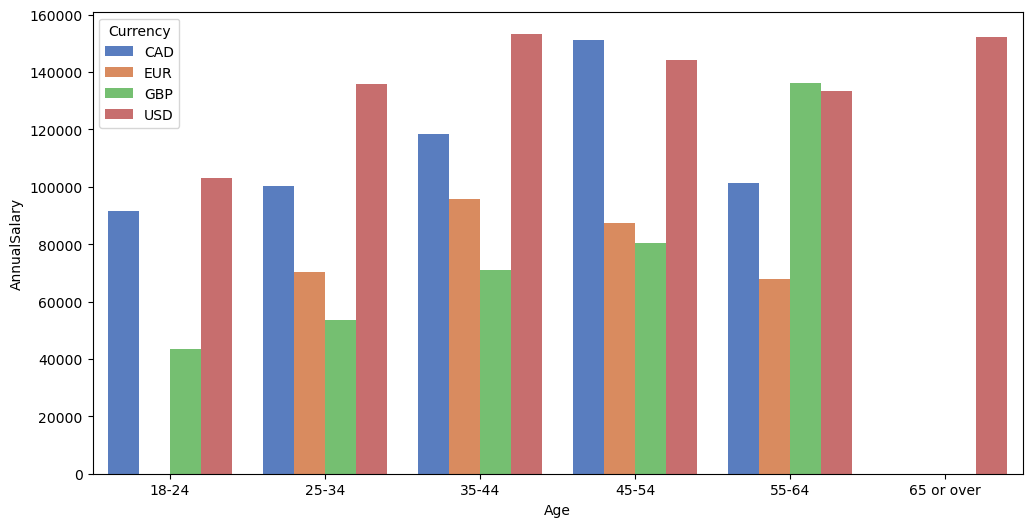

In [52]:
working=df_SE_top4.groupby(['Currency','Age']).agg(AnnualSalary=('Salary', 'mean'))
working=working.reset_index()
fig,ax = plt.subplots(figsize=(12,6))

_=sns.barplot(data=working,x='Age', y='AnnualSalary', hue='Currency',palette='muted', ax=ax )